Purpose: Run hierarchical clustering of treatments (corrected with `pyComBat` and uncorrected log2 TPM) to see relatedness of stress responses.<br>
Author: Anna Pardo<br>
Date initiated: May 16, 2023

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import statistics
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [2]:
# load TPM matrix
tpm = pd.read_csv("../../data/rawtpm_bptreat_noPEG.tsv",sep="\t",header="infer")
tpm.head()

,Sample,BioProject,Treatment,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,SRR11933261,PRJNA637522,Drought,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
1,SRR11933272,PRJNA637522,Drought,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
2,SRR11933250,PRJNA637522,Drought,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
3,SRR11933029,PRJNA637522,Control,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
4,SRR11933040,PRJNA637522,Drought,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [6]:
# define a function from an answer in https://stackoverflow.com/questions/39812885/retain-feature-names-after-scikit-feature-selection
def variance_threshold_selector(data):
    selector = VarianceThreshold()
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [4]:
# set Sample as index and drop BioProject and Treatment columns
ttpm = tpm.set_index("Sample").drop(["BioProject","Treatment"],axis=1)
ttpm.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,0.0,1.122904,0.0,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
SRR11933272,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,0.0,2.280915,0.0,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
SRR11933250,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,0.0,1.908468,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
SRR11933029,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,0.0,1.619452,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
SRR11933040,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,0.0,2.264390,0.0,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [7]:
# put through VarianceThreshold() using the variance_threshold_selector() defined above
vttpm = variance_threshold_selector(ttpm)
vttpm.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,12.553818,2.321077,0.042520,12.932676,5.253755,11.105837,0.409268,0.0,1.122904,0.0,...,0.171184,0.000000,0.0,0.0,0.0,0.309501,0.0,0.000000,0.0,0.000000
SRR11933272,16.255838,3.110372,0.405226,7.214039,1.902461,2.346186,0.170305,0.0,2.280915,0.0,...,0.108052,0.127878,0.0,0.0,0.0,6.703281,0.0,0.000000,0.0,0.000000
SRR11933250,9.028815,2.984479,0.000000,3.092442,2.586555,16.186141,0.000000,0.0,1.908468,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.417565,0.0,0.254123,0.0,1.213349
SRR11933029,8.201340,2.385748,0.000000,1.726808,1.926412,19.600487,0.000000,0.0,1.619452,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.370075
SRR11933040,10.371251,2.799099,0.000000,1.280629,3.771234,19.717683,0.143764,0.0,2.264390,0.0,...,0.178304,0.012158,0.0,0.0,0.0,9.625225,0.0,0.000000,0.0,2.352959


In [8]:
len(ttpm.columns)-len(vttpm.columns)

9

In [9]:
# log-transform TPM
vttpm_log = vttpm.apply(lambda x: np.log2(x+1))
vttpm_log.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Sample,,,,,,,,,,,,,,,,,,,,,
SRR11933261,3.760627,1.731651,0.060075,3.800400,2.644723,3.597631,0.494946,0.0,1.086039,0.0,...,0.227968,0.000000,0.0,0.0,0.0,0.389017,0.0,0.000000,0.0,0.000000
SRR11933272,4.109013,2.039269,0.490802,3.038092,1.537277,1.742518,0.226885,0.0,1.714098,0.0,...,0.148026,0.173611,0.0,0.0,0.0,2.945473,0.0,0.000000,0.0,0.000000
SRR11933250,3.326079,1.994391,0.000000,2.032962,1.842599,4.103174,0.000000,0.0,1.540259,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.503415,0.0,0.326679,0.0,1.146231
SRR11933029,3.201844,1.759475,0.000000,1.447213,1.549133,4.364607,0.000000,0.0,1.389265,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.244933
SRR11933040,3.507319,1.925657,0.000000,1.189432,2.254362,4.372791,0.193789,0.0,1.706813,0.0,...,0.236712,0.017435,0.0,0.0,0.0,3.409421,0.0,0.000000,0.0,1.745435


In [10]:
# load metadata sheet
md = pd.read_csv("../../data/srr_numbers_with_metadata_12-May-2023.csv",sep=",",header="infer")
md.head()

,BioProject,Sample,sample_name,Replicate_num,Genotype,Technology,Library_layout,Treatment,Duration_hours,Time_after_treatment,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,PRJNA637522,SRR11933261,238_WS2,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,PRJNA637522,SRR11933272,238_WS1,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,PRJNA637522,SRR11933250,268_WS1,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,PRJNA637522,SRR11933029,268_WW,NaN,268,Illumina HiSeq 2500,PAIRED,Control,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,PRJNA637522,SRR11933040,268_WS2,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [11]:
# reset index and rename sample column for vttpm_log
vttpm_log = vttpm_log.reset_index().rename(columns={"index":"Sample"})

In [12]:
# merge logTPM with metadata: start for non-pyComBat data
vttpm_log_merged = vttpm_log.merge(md[["Sample","Treatment"]],how="inner")
vttpm_log_merged.drop("Sample",axis=1,inplace=True)
vttpm_log_merged.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030,Treatment
0,3.760627,1.731651,0.060075,3.800400,2.644723,3.597631,0.494946,0.0,1.086039,0.0,...,0.000000,0.0,0.0,0.0,0.389017,0.0,0.000000,0.0,0.000000,Drought
1,4.109013,2.039269,0.490802,3.038092,1.537277,1.742518,0.226885,0.0,1.714098,0.0,...,0.173611,0.0,0.0,0.0,2.945473,0.0,0.000000,0.0,0.000000,Drought
2,3.326079,1.994391,0.000000,2.032962,1.842599,4.103174,0.000000,0.0,1.540259,0.0,...,0.000000,0.0,0.0,0.0,0.503415,0.0,0.326679,0.0,1.146231,Drought
3,3.201844,1.759475,0.000000,1.447213,1.549133,4.364607,0.000000,0.0,1.389265,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.244933,Control
4,3.507319,1.925657,0.000000,1.189432,2.254362,4.372791,0.193789,0.0,1.706813,0.0,...,0.017435,0.0,0.0,0.0,3.409421,0.0,0.000000,0.0,1.745435,Drought


In [13]:
# rename DroughtRepeat to Drought
vttpm_log_merged["Treatment"].mask(vttpm_log_merged["Treatment"]=="DroughtRepeat","Drought",inplace=True)

In [14]:
vttpm_log_merged["Treatment"].unique()

array(['Drought', 'Control', 'Heat', 'Cold', 'Salt', 'Low_Nitrogen',
       'Flooding'], dtype=object)

In [15]:
# scale data to z score
scaler = StandardScaler()
vttpm_log_scaled = pd.DataFrame(scaler.fit_transform(vttpm_log_merged.set_index("Treatment")))
vttpm_log_scaled["Treatment"]=vttpm_log_merged["Treatment"]
vttpm_log_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,38986,38987,38988,38989,38990,38991,38992,38993,38994,Treatment
0,0.690067,-0.363049,-0.370485,0.398519,1.341895,0.426336,0.579181,-0.270279,0.691698,-0.394424,...,-0.541562,-0.125218,-0.118071,-0.278515,-0.076318,-0.028433,-0.280391,-0.126346,-0.759694,Drought
1,1.011541,-0.221419,0.452539,-0.061860,0.426916,-0.638493,-0.048647,-0.270279,1.644866,-0.394424,...,-0.369565,-0.125218,-0.118071,-0.278515,2.111837,-0.028433,-0.280391,-0.126346,-0.759694,Drought
2,0.289085,-0.242081,-0.485275,-0.668887,0.679175,0.716516,-0.580034,-0.270279,1.381041,-0.394424,...,-0.541562,-0.125218,-0.118071,-0.278515,0.021599,-0.028433,0.924503,-0.126346,0.904890,Drought
3,0.174446,-0.350239,-0.485275,-1.022637,0.436711,0.866578,-0.580034,-0.270279,1.151886,-0.394424,...,-0.541562,-0.125218,-0.118071,-0.278515,-0.409291,-0.028433,-0.280391,-0.126346,1.048227,Control
4,0.456325,-0.273727,-0.485275,-1.178318,1.019376,0.871276,-0.126159,-0.270279,1.633810,-0.394424,...,-0.524290,-0.125218,-0.118071,-0.278515,2.508946,-0.028433,-0.280391,-0.126346,1.775068,Drought


In [39]:
# group by treatment and calculate the mean
hcd = vttpm_log_merged.groupby(by="Treatment",axis=0).mean()

In [19]:
hcd.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
Treatment,,,,,,,,,,,,,,,,,,,,,
Cold,2.716636,3.894052,0.257215,3.967630,0.256227,2.693107,0.331510,0.263612,0.139537,0.166653,...,0.069219,1.373191,0.000679,0.002775,0.079381,0.468708,0.000000,0.149976,0.018189,0.271437
Control,2.893063,2.571434,0.237108,3.115250,0.830392,2.816774,0.244310,0.160256,0.579914,0.193212,...,0.139171,0.641595,0.011223,0.007624,0.098215,0.414841,0.011385,0.071413,0.005018,0.448094
Drought,3.360257,2.135025,0.227533,2.993021,1.972315,3.050186,0.275952,0.246845,0.889777,0.273542,...,0.195187,0.186910,0.010025,0.012953,0.153154,0.738307,0.005045,0.073774,0.007286,0.861156
Flooding,1.953715,3.592274,0.162208,2.227704,0.521913,1.606030,0.097254,0.000000,0.733032,0.626460,...,0.223208,0.894478,0.000000,0.000000,0.012598,0.055263,0.000000,0.004022,0.009722,0.496767
Heat,3.465837,1.810041,0.507632,3.444950,0.257987,2.988269,0.179586,0.006194,0.645692,0.038523,...,0.057043,0.269994,0.013272,0.015024,0.042647,0.205726,0.000000,0.043068,0.017081,0.287244


In [40]:
# run hierarchical clustering
h = linkage(hcd,"ward")

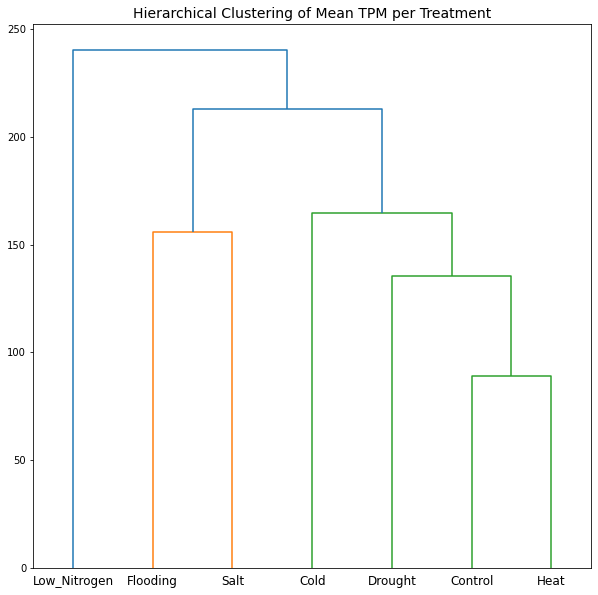

In [41]:
# plot dendrogram: non-pyComBat data
plt.figure(figsize=(10,10))
dendrogram(h,labels=hcd.index)
plt.title("Hierarchical Clustering of Mean TPM per Treatment",fontsize=14)
#plt.savefig("../../figures/PCA/hclust_treatments_mean.pdf")
plt.show()

In [24]:
# plot dendrogram: pyComBat data
plt.figure(figsize=(10,10))
dendrogram(ch,labels=chcd.index)
plt.title("Hierarchical Clustering of Mean TPM per Treatment, corrected with pyComBat",fontsize=14)

plt.show()

NameError: name 'ch' is not defined

<Figure size 720x720 with 0 Axes>

In [16]:
# try again but with median rather than mean
hcd = vttpm_log_merged.groupby(by="Treatment",axis=0).median()

In [17]:
# run hierarchical clustering
h = linkage(hcd,"ward")

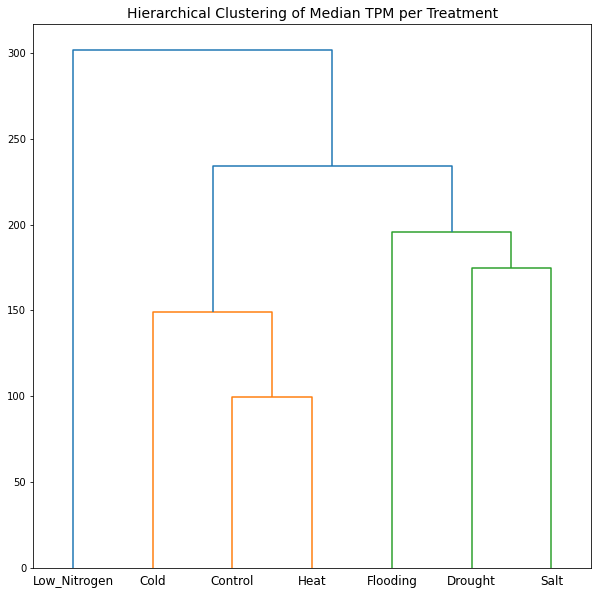

In [18]:
# plot dendrogram: non-pyComBat data
plt.figure(figsize=(10,10))
dendrogram(h,labels=hcd.index)
plt.title("Hierarchical Clustering of Median TPM per Treatment",fontsize=14)
plt.savefig("../../figures/PCA/hclust_treatments_median.pdf")
plt.show()

(array([1.8614e+04, 5.6650e+03, 5.3390e+03, 4.9210e+03, 2.9270e+03,
        1.0700e+03, 3.6100e+02, 8.2000e+01, 1.4000e+01, 2.0000e+00]),
 array([ 0.        ,  1.17761464,  2.35522928,  3.53284393,  4.71045857,
         5.88807321,  7.06568785,  8.2433025 ,  9.42091714, 10.59853178,
        11.77614642]),
 <BarContainer object of 10 artists>)

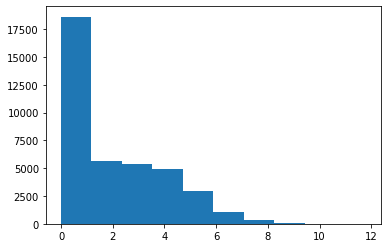

In [42]:
plt.hist(hcd.transpose()["Cold"])

In [43]:
drought = vttpm_log_scaled[vttpm_log_scaled["Treatment"]=="Drought"]

In [44]:
drought.head()

,0,1,2,3,4,5,6,7,8,9,...,38986,38987,38988,38989,38990,38991,38992,38993,38994,Treatment
0,0.690067,-0.363049,-0.370485,0.398519,1.341895,0.426336,0.579181,-0.270279,0.691698,-0.394424,...,-0.541562,-0.125218,-0.118071,-0.278515,-0.076318,-0.028433,-0.280391,-0.126346,-0.759694,Drought
1,1.011541,-0.221419,0.452539,-0.061860,0.426916,-0.638493,-0.048647,-0.270279,1.644866,-0.394424,...,-0.369565,-0.125218,-0.118071,-0.278515,2.111837,-0.028433,-0.280391,-0.126346,-0.759694,Drought
2,0.289085,-0.242081,-0.485275,-0.668887,0.679175,0.716516,-0.580034,-0.270279,1.381041,-0.394424,...,-0.541562,-0.125218,-0.118071,-0.278515,0.021599,-0.028433,0.924503,-0.126346,0.904890,Drought
4,0.456325,-0.273727,-0.485275,-1.178318,1.019376,0.871276,-0.126159,-0.270279,1.633810,-0.394424,...,-0.524290,-0.125218,-0.118071,-0.278515,2.508946,-0.028433,-0.280391,-0.126346,1.775068,Drought
5,2.077461,1.064997,-0.485275,1.081461,1.636259,-1.379483,0.345036,1.657576,1.553959,-0.394424,...,-0.541562,-0.125218,4.692033,-0.278515,-0.409291,-0.028433,-0.280391,-0.126346,1.245519,Drought


(array([248.,  94.,  68.,  80.,  56.,  30.,  11.,   8.,   9.,   4.]),
 array([-0.64533004, -0.12488916,  0.39555171,  0.91599259,  1.43643346,
         1.95687434,  2.47731521,  2.99775609,  3.51819696,  4.03863784,
         4.55907872]),
 <BarContainer object of 10 artists>)

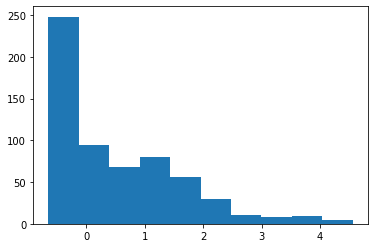

In [47]:
plt.hist(drought[110])